In [ ]:
!pip install xgboost

In [ ]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

In [ ]:
df = pd.read_csv('/content/updated Kappa data_csv.csv', encoding='latin-1')
# df = pd.read_csv('/content/updated Kappa data_csv.csv')

/tmp/ipython-input-2-602786347.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/updated Kappa data_csv.csv', encoding='latin-1')


In [ ]:
df.head()

,Date Time,Chip Meter Speed,Upper Extraction Temperature °C shifted,Upper Extraction Temperature,Digester Top Liquor Impregnation Temp °C shifted,Digester Top Liquor Impregnation Temp,WL Strength gpl,Digester Production Bdt/d,Feed WL Charge % shifted,Feed WL Charge,Digester Liquor Level %,Cook WL Charge % shifted,Cook WL Charge,COOKING CIRCULATION TEMP-1 °C shifted,COOKING CIRCULATION TEMP-1,CHIP BIN BOTTOM CV °C shifted,CHIP BIN BOTTOM CV,WASH EXTRACTION FLOW m³/hr,BLOWLINE CV m³/hr,DIGESTER BOTTOM DILUTION CV m³/hr,DIGESTER CHIP INDICATOR MIDDLE %,Blow Line Kappa sensor,Downflow Factor
0,01-Jan-25 09:00:00,40.31260834,156.2779572,158.0682068,153.7901886,156.5294891,107,712.7384033,11.35315075,11.60461597,37.33834915,6.089908504,6.198239136,158.6444489,161.4438019,87.99176025,88.54611969,235.9325562,247.788205,276.6666667,57.91162949,18.05316707,6.972120828
1,01-Jan-25 09:05:00,40.79526774,156.777298,157.9924011,153.0089264,156.085144,107,713.8894043,11.33106899,11.62107563,37.24382019,6.076548338,6.20992918,159.1300507,161.3925323,88.10368347,88.88487091,235.8848267,254.0700439,280,64.55260468,18.05416985,7.058399892
2,01-Jan-25 09:10:00,40.80195618,157.2123566,157.9544983,152.8062866,155.626767,107,714.0036011,11.5840332,11.57939014,36.18456573,7.118978786,6.206032435,159.0921478,161.341629,87.95559692,88.90592957,233.0874207,249.2677216,280,77.16213074,18.06118927,6.801819215
3,01-Jan-25 09:15:00,40.80195618,157.2936554,157.941864,152.8630493,155.1750977,107,713.9893392,11.71130638,11.59649353,36.05067444,7.198775101,6.19907403,158.7383881,161.3925323,88.12039337,88.50400543,233.1828766,246.8336029,280,62.47077713,18.05650965,6.723343395
4,01-Jan-25 09:20:00,40.80070305,157.1491852,157.8786926,152.3796448,154.8015594,107,713.9822083,12.3591671,11.59635487,36.83822403,6.406623554,6.200465679,158.1533508,161.2531891,87.68711472,88.12268219,233.1268463,254.5925079,280,51.99276581,18.05066013,6.982337157


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129564 entries, 0 to 129563
Data columns (total 23 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Date Time                                         49930 non-null  object
 1   Chip Meter Speed                                  49930 non-null  object
 2   Upper Extraction Temperature °C shifted           49930 non-null  object
 3   Upper Extraction Temperature                      49930 non-null  object
 4   Digester Top Liquor Impregnation Temp °C shifted  49930 non-null  object
 5   Digester Top Liquor Impregnation Temp             49930 non-null  object
 6   WL Strength gpl                                   49930 non-null  object
 7   Digester Production Bdt/d                         49930 non-null  object
 8   Feed WL Charge % shifted                          49930 non-null  object
 9   Feed WL Charge            

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(49930, 23)

In [ ]:
df.columns

Index(['Date Time', 'Chip Meter Speed',
       'Upper Extraction Temperature °C shifted',
       'Upper Extraction Temperature',
       'Digester Top Liquor Impregnation Temp °C shifted',
       'Digester Top Liquor Impregnation Temp', 'WL Strength gpl',
       'Digester Production Bdt/d', 'Feed WL Charge % shifted',
       'Feed WL Charge', 'Digester Liquor Level %', 'Cook WL Charge % shifted',
       'Cook WL Charge', 'COOKING CIRCULATION TEMP-1 °C shifted',
       'COOKING CIRCULATION TEMP-1', 'CHIP BIN BOTTOM CV °C shifted',
       'CHIP BIN BOTTOM CV', 'WASH EXTRACTION FLOW m³/hr', 'BLOWLINE CV m³/hr',
       'DIGESTER BOTTOM DILUTION CV m³/hr',
       'DIGESTER CHIP INDICATOR MIDDLE  %', 'Blow Line Kappa sensor',
       'Downflow Factor'],
      dtype='object')

In [ ]:
df = df[['Chip Meter Speed',
       'Upper Extraction Temperature °C shifted',
       'Digester Top Liquor Impregnation Temp °C shifted', 'WL Strength gpl',
       'Digester Production Bdt/d', 'Feed WL Charge % shifted',
       'Digester Liquor Level %', 'Cook WL Charge % shifted',
       'COOKING CIRCULATION TEMP-1 °C shifted', 'CHIP BIN BOTTOM CV °C shifted','WASH EXTRACTION FLOW m³/hr', 'BLOWLINE CV m³/hr',
       'DIGESTER BOTTOM DILUTION CV m³/hr',
       'DIGESTER CHIP INDICATOR MIDDLE  %', 'Blow Line Kappa sensor']]

In [ ]:
df.head()

,Chip Meter Speed,Upper Extraction Temperature °C shifted,Digester Top Liquor Impregnation Temp °C shifted,WL Strength gpl,Digester Production Bdt/d,Feed WL Charge % shifted,Digester Liquor Level %,Cook WL Charge % shifted,COOKING CIRCULATION TEMP-1 °C shifted,CHIP BIN BOTTOM CV °C shifted,WASH EXTRACTION FLOW m³/hr,BLOWLINE CV m³/hr,DIGESTER BOTTOM DILUTION CV m³/hr,DIGESTER CHIP INDICATOR MIDDLE %,Blow Line Kappa sensor
0,40.312608,156.277957,153.790189,107.0,712.738403,11.353151,37.338349,6.089909,158.644449,87.991760,235.932556,247.788205,276.666667,57.911629,18.053167
1,40.795268,156.777298,153.008926,107.0,713.889404,11.331069,37.243820,6.076548,159.130051,88.103683,235.884827,254.070044,280.000000,64.552605,18.054170
2,40.801956,157.212357,152.806287,107.0,714.003601,11.584033,36.184566,7.118979,159.092148,87.955597,233.087421,249.267722,280.000000,77.162131,18.061189
3,40.801956,157.293655,152.863049,107.0,713.989339,11.711306,36.050674,7.198775,158.738388,88.120393,233.182877,246.833603,280.000000,62.470777,18.056510
4,40.800703,157.149185,152.379645,107.0,713.982208,12.359167,36.838224,6.406624,158.153351,87.687115,233.126846,254.592508,280.000000,51.992766,18.050660


In [ ]:
# df.drop('Date Time',axis=1, inplace=True)

In [ ]:
df.shape

(49930, 16)

In [ ]:
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d-%b-%y %H:%M:%S')
# df.set_index('Date Time', inplace=True)

In [ ]:
df['Date Time']

,Date Time
0,2025-01-01 09:00:00
1,2025-01-01 09:05:00
2,2025-01-01 09:10:00
3,2025-01-01 09:15:00
4,2025-01-01 09:20:00
...,...
49925,2025-06-23 17:25:00
49926,2025-06-23 17:30:00
49927,2025-06-23 17:35:00
49928,2025-06-23 17:40:00


In [ ]:
df.dtypes

,0
Date Time,datetime64[ns]
Chip Meter Speed,object
Upper Extraction Temperature °C shifted,object
Digester Top Liquor Impregnation Temp °C shifted,object
WL Strength gpl,object
Digester Production Bdt/d,object
Feed WL Charge % shifted,object
Digester Liquor Level %,object
Cook WL Charge % shifted,object
COOKING CIRCULATION TEMP-1 °C shifted,object


In [ ]:
for col in df.columns:
  df[col] = pd.to_numeric(df[col],errors= 'coerce')
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47709 entries, 0 to 49929
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date Time                                         47709 non-null  int64  
 1   Chip Meter Speed                                  47709 non-null  float64
 2   Upper Extraction Temperature °C shifted           47709 non-null  float64
 3   Digester Top Liquor Impregnation Temp °C shifted  47709 non-null  float64
 4   WL Strength gpl                                   47709 non-null  float64
 5   Digester Production Bdt/d                         47709 non-null  float64
 6   Feed WL Charge % shifted                          47709 non-null  float64
 7   Digester Liquor Level %                           47709 non-null  float64
 8   Cook WL Charge % shifted                          47709 non-null  float64
 9   COOKING CIRCULATION TE

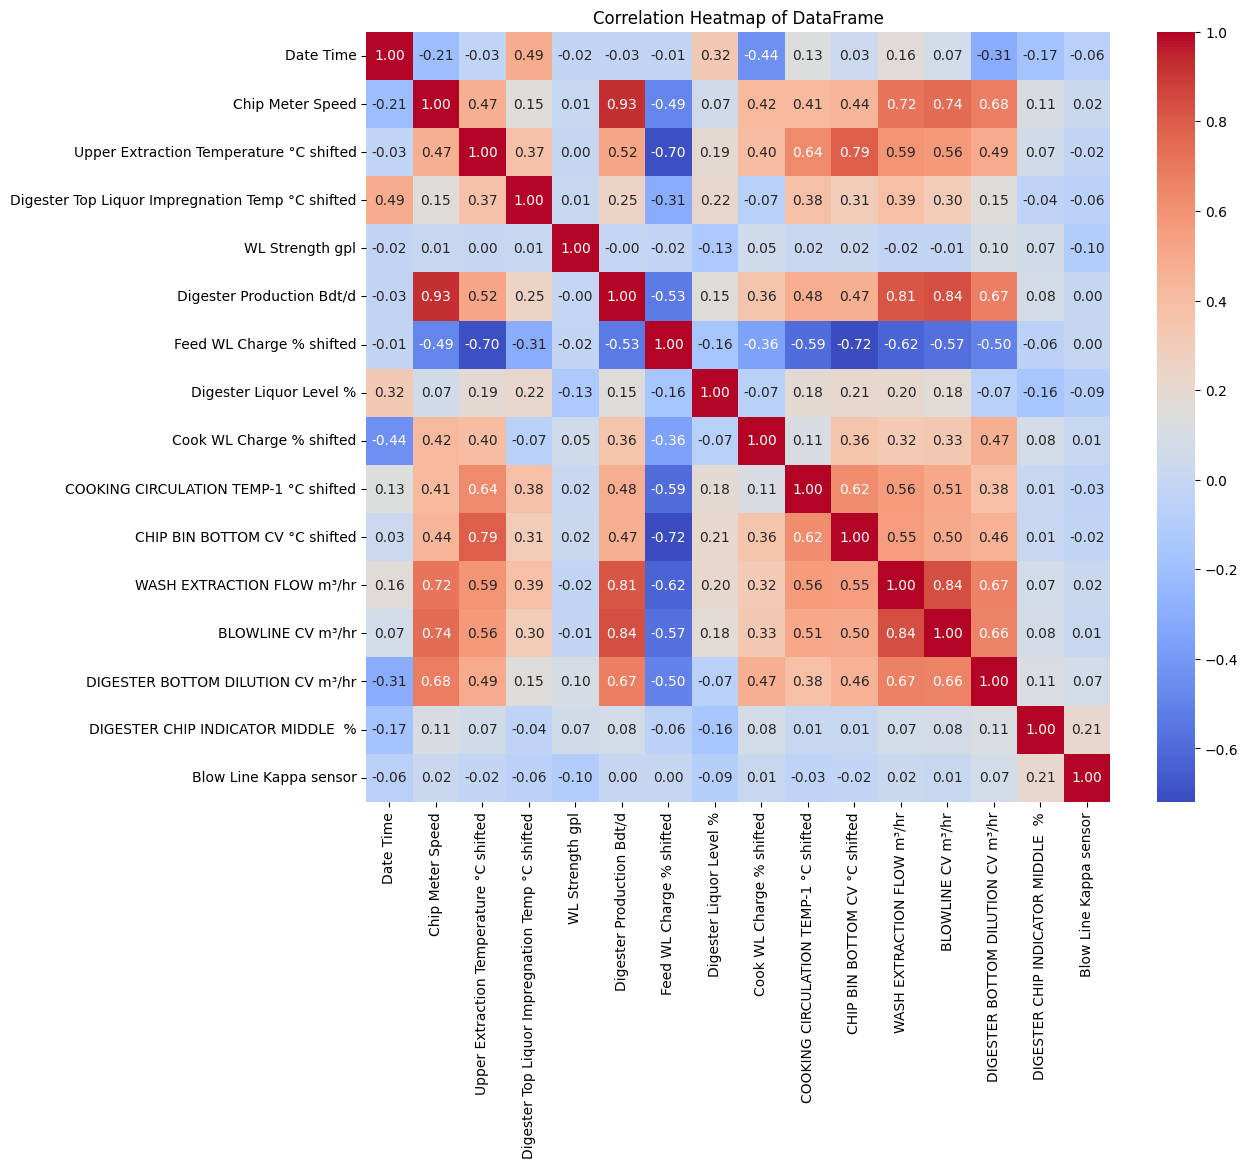

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()

In [ ]:
df = df[(df['Chip Meter Speed'] >= 30) & (df['Chip Meter Speed'] <= 45)]
df = df[(df['Upper Extraction Temperature °C shifted'] >= 145) & (df['Upper Extraction Temperature °C shifted'] <= 165)]
df = df[(df['Digester Top Liquor Impregnation Temp °C shifted'] >= 135) & (df[ 'Digester Top Liquor Impregnation Temp °C shifted'] <= 160)]
df = df[(df['WL Strength gpl'] >= 95) & (df['WL Strength gpl'] <= 115)]
df = df[(df['Digester Production Bdt/d'] >= 600) & (df['Digester Production Bdt/d'] <= 800)]
df = df[(df['Feed WL Charge % shifted'] >= 10) & (df['Feed WL Charge % shifted'] <= 20)]
df = df[(df['Digester Liquor Level %'] >= 25) & (df['Digester Liquor Level %'] <= 55)]
df = df[(df['Cook WL Charge % shifted'] >= 4.5) & (df['Cook WL Charge % shifted'] <= 8.5)]
df = df[(df['COOKING CIRCULATION TEMP-1 °C shifted'] >= 150) & (df['COOKING CIRCULATION TEMP-1 °C shifted'] <= 170)]
df = df[(df['CHIP BIN BOTTOM CV °C shifted'] >= 80) & (df['CHIP BIN BOTTOM CV °C shifted'] <= 95)]
df = df[(df['WASH EXTRACTION FLOW m³/hr'] >= 180) & (df['WASH EXTRACTION FLOW m³/hr'] <= 260)]
df = df[(df['BLOWLINE CV m³/hr'] >= 200) & (df['BLOWLINE CV m³/hr'] <= 330)]
df = df[(df['DIGESTER BOTTOM DILUTION CV m³/hr'] >= 240) & (df['DIGESTER BOTTOM DILUTION CV m³/hr'] <= 300)]
df = df[(df['Blow Line Kappa sensor'] >= 14) & (df['Blow Line Kappa sensor'] <= 26)]

In [ ]:
df.head()

,Date Time,Chip Meter Speed,Upper Extraction Temperature °C shifted,Digester Top Liquor Impregnation Temp °C shifted,WL Strength gpl,Digester Production Bdt/d,Feed WL Charge % shifted,Digester Liquor Level %,Cook WL Charge % shifted,COOKING CIRCULATION TEMP-1 °C shifted,CHIP BIN BOTTOM CV °C shifted,WASH EXTRACTION FLOW m³/hr,BLOWLINE CV m³/hr,DIGESTER BOTTOM DILUTION CV m³/hr,DIGESTER CHIP INDICATOR MIDDLE %,Blow Line Kappa sensor
0,1735722000000000000,40.312608,156.277957,153.790189,107.0,712.738403,11.353151,37.338349,6.089909,158.644449,87.991760,235.932556,247.788205,276.666667,57.911629,18.053167
1,1735722300000000000,40.795268,156.777298,153.008926,107.0,713.889404,11.331069,37.243820,6.076548,159.130051,88.103683,235.884827,254.070044,280.000000,64.552605,18.054170
2,1735722600000000000,40.801956,157.212357,152.806287,107.0,714.003601,11.584033,36.184566,7.118979,159.092148,87.955597,233.087421,249.267722,280.000000,77.162131,18.061189
3,1735722900000000000,40.801956,157.293655,152.863049,107.0,713.989339,11.711306,36.050674,7.198775,158.738388,88.120393,233.182877,246.833603,280.000000,62.470777,18.056510
4,1735723200000000000,40.800703,157.149185,152.379645,107.0,713.982208,12.359167,36.838224,6.406624,158.153351,87.687115,233.126846,254.592508,280.000000,51.992766,18.050660


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23961 entries, 0 to 49143
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Date Time                                         23961 non-null  int64  
 1   Chip Meter Speed                                  23961 non-null  float64
 2   Upper Extraction Temperature °C shifted           23961 non-null  float64
 3   Digester Top Liquor Impregnation Temp °C shifted  23961 non-null  float64
 4   WL Strength gpl                                   23961 non-null  float64
 5   Digester Production Bdt/d                         23961 non-null  float64
 6   Feed WL Charge % shifted                          23961 non-null  float64
 7   Digester Liquor Level %                           23961 non-null  float64
 8   Cook WL Charge % shifted                          23961 non-null  float64
 9   COOKING CIRCULATION TE

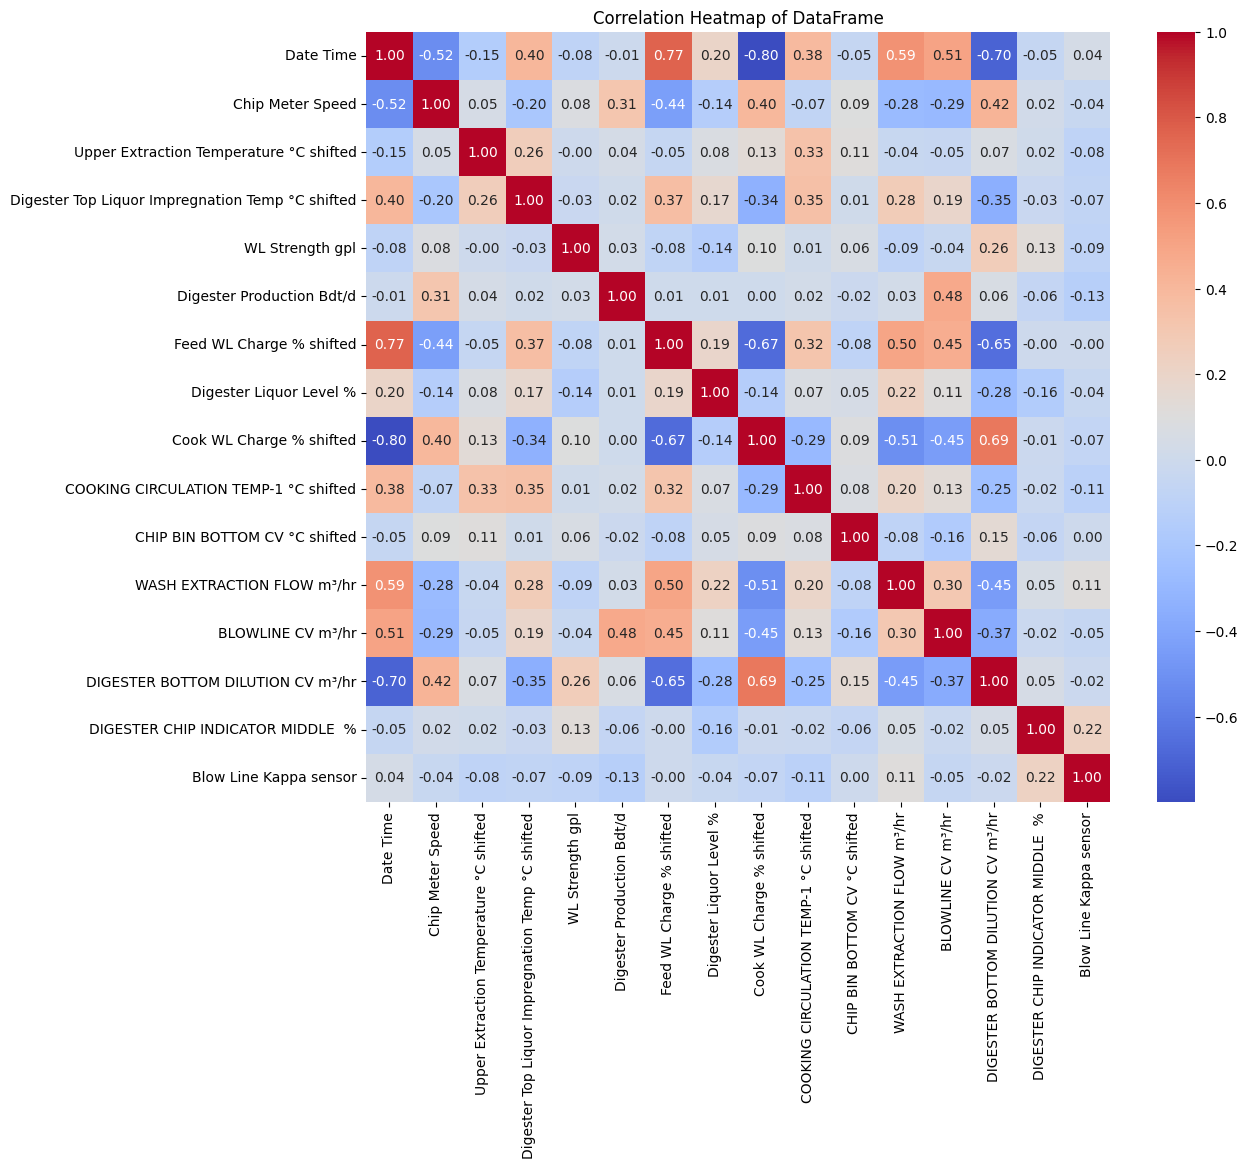

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame')
plt.show()

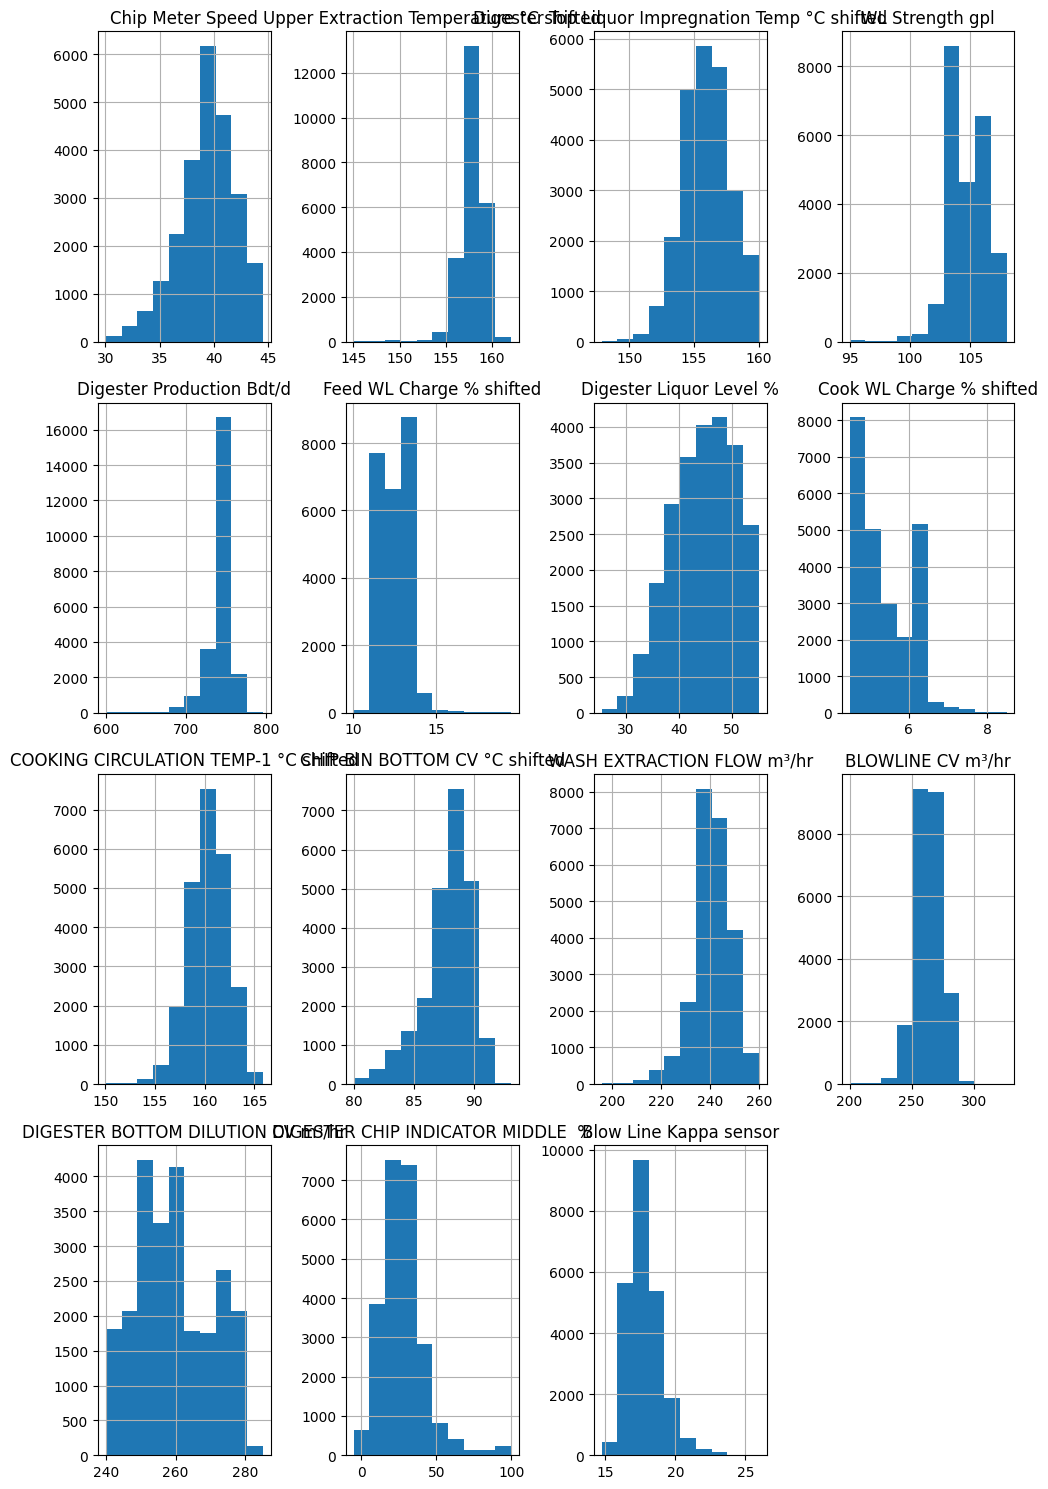

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,15))
plt.tight_layout()
plt.show()
# plt.hist(df)

In [ ]:
df.shape

(23961, 16)

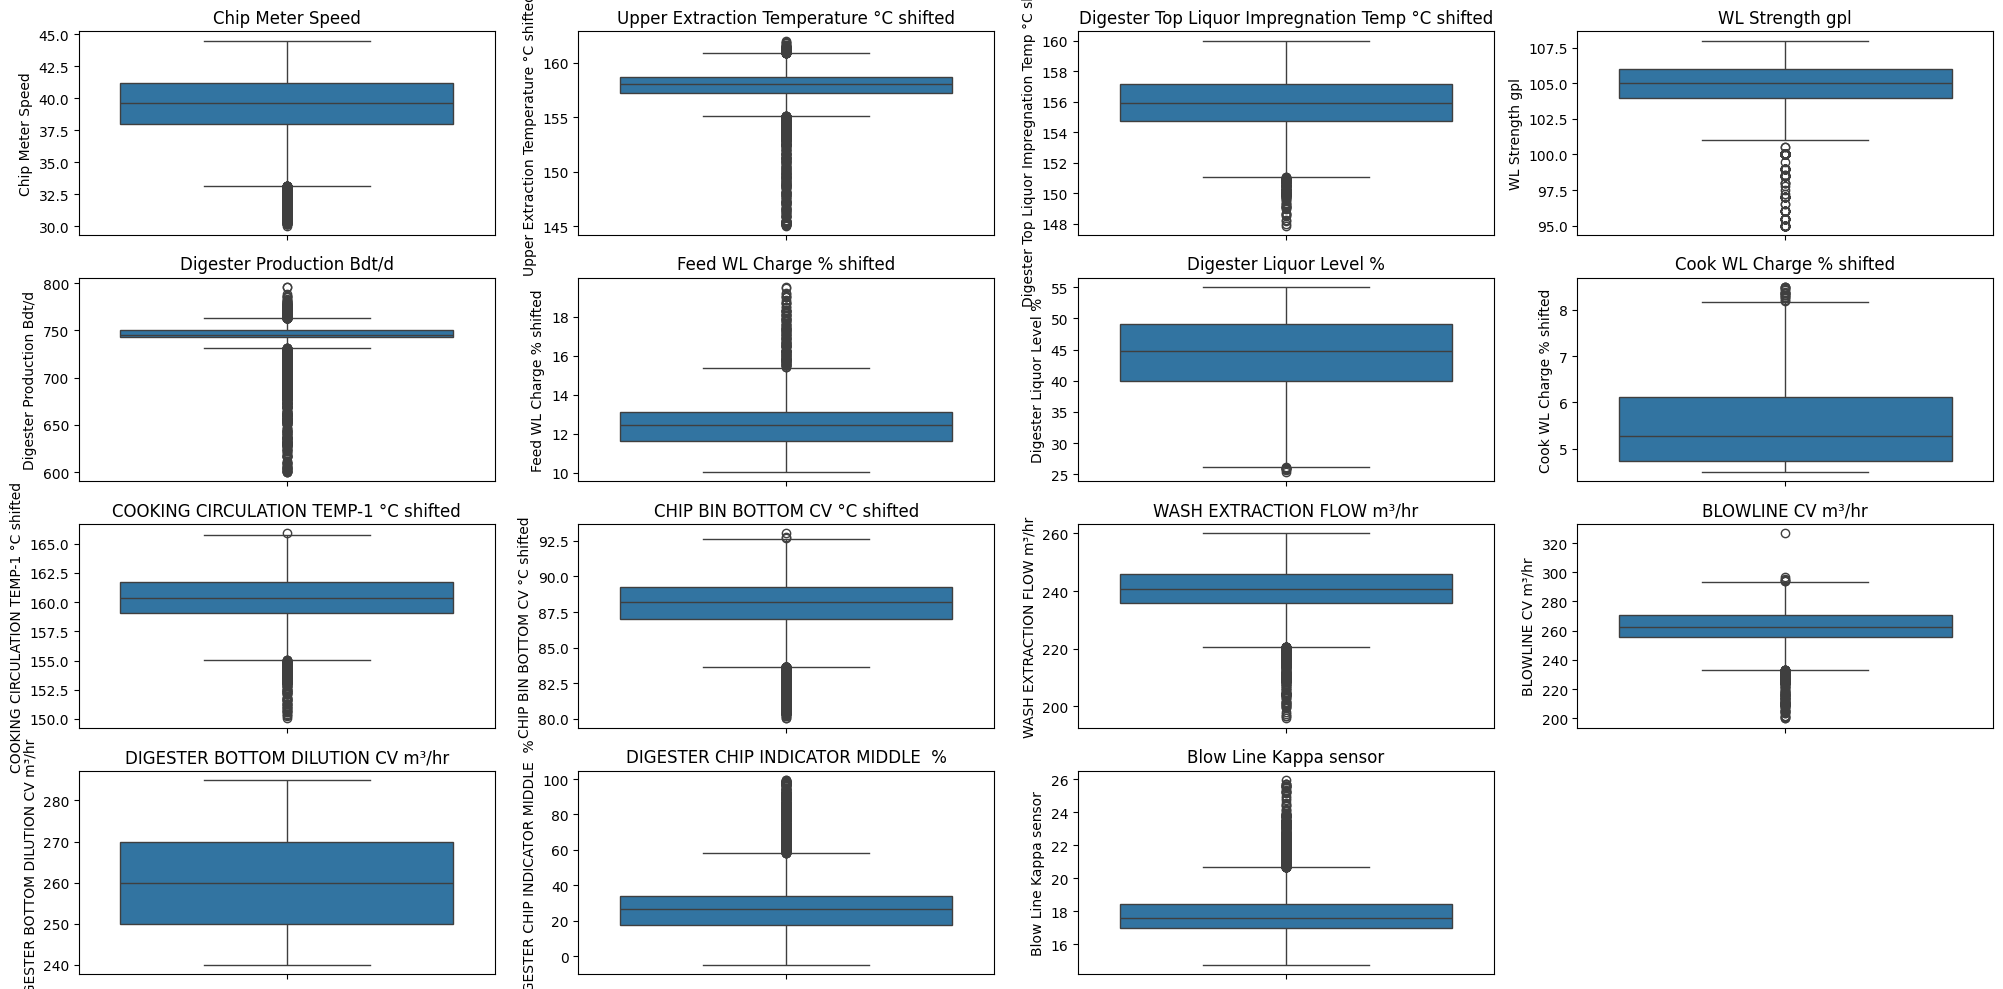

In [ ]:

plt.figure(figsize=(20, 10))
for i, col in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [ ]:
df.describe()

,Chip Meter Speed,Upper Extraction Temperature °C shifted,Digester Top Liquor Impregnation Temp °C shifted,WL Strength gpl,Digester Production Bdt/d,Feed WL Charge % shifted,Digester Liquor Level %,Cook WL Charge % shifted,COOKING CIRCULATION TEMP-1 °C shifted,CHIP BIN BOTTOM CV °C shifted,WASH EXTRACTION FLOW m³/hr,BLOWLINE CV m³/hr,DIGESTER BOTTOM DILUTION CV m³/hr,DIGESTER CHIP INDICATOR MIDDLE %,Blow Line Kappa sensor
count,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000,23961.000000
mean,39.334408,157.874193,155.991027,104.805774,743.568742,12.492465,44.648422,5.360091,160.359847,87.811273,241.068929,263.887964,259.340194,27.920928,17.829313
std,2.523425,1.399996,1.827215,1.568413,16.114778,0.867678,5.882632,0.673053,1.981882,2.006063,7.753703,10.719064,11.452777,14.485547,1.257092
min,30.053771,145.043719,147.875183,95.000000,600.032324,10.041908,25.392986,4.500045,150.046417,80.020599,195.855771,200.011190,240.000000,-4.999998,14.746319
25%,37.903989,157.281021,154.775922,104.000000,743.473389,11.652422,40.325172,4.711373,159.104782,86.901808,236.802075,256.794696,250.000000,17.451766,16.973755
50%,39.579834,158.030304,155.997864,105.000000,745.501099,12.535642,45.076140,5.218490,160.438538,88.154268,240.946304,263.778442,260.000000,26.331381,17.628341
75%,41.097577,158.710922,157.248900,106.000000,750.741272,13.138191,49.354577,6.085684,161.759674,89.198442,246.114140,271.514154,270.000000,34.171953,18.448411
max,44.506816,162.049164,159.999130,108.000000,795.922498,19.512476,54.999437,8.491128,165.865875,93.024367,259.978210,326.535742,285.000000,99.553561,25.947968


In [ ]:
from sklearn.model_selection import train_test_split

df_train_random, df_test_random = train_test_split(df, test_size=0.2, random_state=42)

print("Random Split:")
print("Training set shape:", df_train_random.shape)
print("Testing set shape:", df_test_random.shape)

# # Sequential Split
# train_size = int(len(df) * 0.8)
# df_train_sequential = df.iloc[:train_size]
# df_test_sequential = df.iloc[train_size:]

# print("\nSequential Split:")
# print("Training set shape:", df_train_sequential.shape)
# print("Testing set shape:", df_test_sequential.shape)

Random Split:
Training set shape: (19168, 15)
Testing set shape: (4793, 15)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train_rnd = df_train_random.drop('Blow Line Kappa sensor', axis=1)
y_train_rnd = df_train_random['Blow Line Kappa sensor']
X_test_rnd = df_test_random.drop('Blow Line Kappa sensor', axis=1)
y_test_rnd = df_test_random['Blow Line Kappa sensor']

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train_rnd, y_train_rnd)

y_pred_lr = lr_model.predict(X_test_rnd)
rmse_lr = np.sqrt(mean_squared_error(y_test_rnd, y_pred_lr))
r2_lr = r2_score(y_test_rnd, y_pred_lr)
print(f"Linear Regression - RMSE: {rmse_lr:.4f}, R2: {r2_lr:.4f}")

Linear Regression - RMSE: 1.1853, R2: 0.1098


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_rnd, y_train_rnd)

y_pred_rf = rf_model.predict(X_test_rnd)
rmse_rf = np.sqrt(mean_squared_error(y_test_rnd, y_pred_rf))
r2_rf = r2_score(y_test_rnd, y_pred_rf)
print(f"Random Forest Regressor - RMSE: {rmse_rf:.4f}, R2: {r2_rf:.4f}")

Random Forest Regressor - RMSE: 0.7642, R2: 0.6300


In [ ]:
mae_rf = mean_absolute_error(y_test_rnd, y_pred_rf)
mae_rf

0.5443621103710071

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
  ('scaler', StandardScaler()),
  ('model', RandomForestRegressor(n_estimators=200, random_state=42, n_jobs = -1))
])

pipe.fit(X_train_rnd, y_train_rnd)
y_pred_pipe = pipe.predict(X_test_rnd)

rmse_pipe = np.sqrt(mean_squared_error(y_test_rnd, y_pred_pipe))
r2_pipe = r2_score(y_test_rnd, y_pred_pipe)

print(f"Pipeline (StandardScaler + RandomForestRegressor) - RMSE: {rmse_pipe:.4f}, R2: {r2_pipe:.4f}")

Pipeline (StandardScaler + RandomForestRegressor) - RMSE: 1.8321, R2: -0.3320


In [ ]:
mae_et = mean_absolute_error(y_test_rnd, y_pred_pipe)
mae_et

1.5250380323140211

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

et_model = ExtraTreesRegressor(n_estimators=300, random_state=42, n_jobs=-1)
et_model.fit(X_train_rnd, y_train_rnd)

y_pred_et = et_model.predict(X_test_rnd)
rmse_et = np.sqrt(mean_squared_error(y_test_rnd, y_pred_et))
r2_et = r2_score(y_test_rnd, y_pred_et)
mae_et = mean_absolute_error(y_test_rnd, y_pred_et)
print(f"Extra Trees Regressor - RMSE: {rmse_et:.4f}, R2: {r2_et:.4f}")

Extra Trees Regressor - RMSE: 0.6827, R2: 0.7047


In [ ]:
mae_et

0.4781361854255898

In [ ]:
pipe_1 = Pipeline([
    ('scaler', StandardScaler()),
  ('model', ExtraTreesRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

et_pipe = pipe_1.fit(X_train_rnd, y_train_rnd)

y_pred_et_pp = et_pipe.predict(X_test_rnd)
rmse_et = np.sqrt(mean_squared_error(y_test_rnd, y_pred_et_pp))
r2_et = r2_score(y_test_rnd, y_pred_et_pp)
print(f"Extra Trees Regressor - RMSE: {rmse_et:.4f}, R2: {r2_et:.4f}")

Extra Trees Regressor - RMSE: 0.6717, R2: 0.7084


In [ ]:
import plotly.express as px
px.line(y=[y_test_rnd,y_pred_et])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [150, 200, 300],
    'max_depth': [20, 25, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_et = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=1,verbose=3)

grid_search_et.fit(X_train_rnd, y_train_rnd)

print("Best parameters found: ", grid_search_et.best_params_)
best_rmse = np.sqrt(-grid_search_et.best_score_)
print(f"Best cross-validation RMSE: {best_rmse:.4f}")

best_et_model = grid_search_et.best_estimator_
y_pred_best_et = best_et_model.predict(X_test_rnd)

rmse_best_et = np.sqrt(mean_squared_error(y_test_rnd, y_pred_best_et))
r2_best_et = r2_score(y_test_rnd, y_pred_best_et)

print(f"Extra Trees Regressor (Tuned) - Test RMSE: {rmse_best_et:.4f}, Test R2: {r2_best_et:.4f}")


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.960 total time=   2.4s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.994 total time=   2.9s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=-0.975 total time=   2.5s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.960 total time=   3.8s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.995 total time=   3.8s
[CV 3/3] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=-0.977 total time=   4.0s
[CV 1/3] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.968 total time=   2.4s
[CV 2/3] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=-0.997 tot

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train_rnd, y_train_rnd)

y_pred_xgb = xgb_model.predict(X_test_rnd)
rmse_xgb = np.sqrt(mean_squared_error(y_test_rnd, y_pred_xgb))
r2_xgb = r2_score(y_test_rnd, y_pred_xgb)

print(f"XGBoost Regressor - RMSE: {rmse_xgb:.4f}, R2: {r2_xgb:.4f}")


XGBoost Regressor - RMSE: 0.8909, R2: 0.4972


In [ ]:
import lightgbm as lgb

lgbm_model = lgb.LGBMRegressor(random_state=42)
lgbm_model.fit(X_train_rnd, y_train_rnd)

y_pred_lgbm = lgbm_model.predict(X_test_rnd)

rmse_lgbm = np.sqrt(mean_squared_error(y_test_rnd, y_pred_lgbm))
r2_lgbm = r2_score(y_test_rnd, y_pred_lgbm)

print(f"LightGBM Regressor - RMSE: {rmse_lgbm:.4f}, R2: {r2_lgbm:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3229
[LightGBM] [Info] Number of data points in the train set: 19168, number of used features: 14
[LightGBM] [Info] Start training from score 17.825193
LightGBM Regressor - RMSE: 0.9096, R2: 0.4758


##Testing

In [ ]:
df_test = pd.read_excel('/content/testing data updated.xlsx')

In [ ]:
df_test.shape

(130861, 22)

In [ ]:
df_test = df_test.dropna()

In [ ]:
df.columns

Index(['Date Time', 'Chip Meter Speed',
       'Upper Extraction Temperature °C shifted',
       'Digester Top Liquor Impregnation Temp °C shifted', 'WL Strength gpl',
       'Digester Production Bdt/d', 'Feed WL Charge % shifted',
       'Digester Liquor Level %', 'Cook WL Charge % shifted',
       'COOKING CIRCULATION TEMP-1 °C shifted',
       'CHIP BIN BOTTOM CV °C shifted', 'WASH EXTRACTION FLOW m³/hr',
       'BLOWLINE CV m³/hr', 'DIGESTER BOTTOM DILUTION CV m³/hr',
       'DIGESTER CHIP INDICATOR MIDDLE  %', 'Blow Line Kappa sensor'],
      dtype='object')

In [ ]:
df_test.columns

Index(['Date Time', 'Chip Meter Speed',
       'Upper Extraction Temperature °C shifted',
       'Upper Extraction Temperature',
       'Digester Top Liquor Impregnation Temp °C shifted',
       'Digester Top Liquor Impregnation Temp', 'WL Strength gpl',
       'Digester Production Bdt/d', 'Feed WL Charge % shifted',
       'Feed WL Charge', 'Digester Liquor Level %', 'Cook WL Charge % shifted',
       'Cook WL Charge', 'COOKING CIRCULATION TEMP-1 °C shifted',
       'COOKING CIRCULATION TEMP-1', 'CHIP BIN BOTTOM CV °C shifted',
       'CHIP BIN BOTTOM CV', 'WASH EXTRACTION FLOW m³/hr', 'BLOWLINE CV m³/hr',
       'DIGESTER BOTTOM DILUTION CV m³/hr',
       'DIGESTER CHIP INDICATOR MIDDLE  %', 'Blow Line Kappa sensor'],
      dtype='object')

In [ ]:
df_test = df_test[['Date Time','Chip Meter Speed',
       'Upper Extraction Temperature °C shifted',
       'Digester Top Liquor Impregnation Temp °C shifted', 'WL Strength gpl',
       'Digester Production Bdt/d', 'Feed WL Charge % shifted',
       'Digester Liquor Level %', 'Cook WL Charge % shifted',
       'COOKING CIRCULATION TEMP-1 °C shifted', 'CHIP BIN BOTTOM CV °C shifted','WASH EXTRACTION FLOW m³/hr', 'BLOWLINE CV m³/hr',
       'DIGESTER BOTTOM DILUTION CV m³/hr',
       'DIGESTER CHIP INDICATOR MIDDLE  %', 'Blow Line Kappa sensor']]

In [ ]:
df_test['Date Time'] = pd.to_datetime(df_test['Date Time'], format='%d-%b-%y %H:%M:%S')

In [ ]:
cutoff_datetime = pd.to_datetime('2025-06-23 17:45:00', format='%Y-%m-%d %H:%M:%S')

df_test = df_test[df_test['Date Time'] > cutoff_datetime].copy()

print("Filtered DataFrame:")
print(df_test.shape)
print("\nFiltered DataFrame Info:")
df_test.info()

Filtered DataFrame:
(10815, 16)

Filtered DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10815 entries, 120046 to 130860
Data columns (total 16 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   Date Time                                         10815 non-null  datetime64[ns]
 1   Chip Meter Speed                                  10815 non-null  float64       
 2   Upper Extraction Temperature °C shifted           10815 non-null  float64       
 3   Digester Top Liquor Impregnation Temp °C shifted  10815 non-null  float64       
 4   WL Strength gpl                                   10815 non-null  float64       
 5   Digester Production Bdt/d                         10815 non-null  float64       
 6   Feed WL Charge % shifted                          10815 non-null  float64       
 7   Digester Liquor Level %                           108

In [ ]:
df_test.drop('Date Time',axis =1, inplace=True)

In [ ]:
df_test['Date Time'].describe()

,Date Time
count,130861
mean,2025-05-16 19:29:59.999999488
min,2025-04-01 09:00:00
25%,2025-04-24 02:15:00
50%,2025-05-16 19:30:00
75%,2025-06-08 12:45:00
max,2025-07-01 06:00:00


In [ ]:
df_test.shape

(130861, 16)

In [ ]:
for col in df.columns:
  df_test[col] = pd.to_numeric(df_test[col],errors= 'coerce')
df_test.dropna(inplace = True)

In [ ]:
df_test.shape

(10815, 16)

In [ ]:
# df_test = df_test[(df_test['Chip Meter Speed'] >= 30) & (df_test['Chip Meter Speed'] <= 45)]
# df_test = df_test[(df_test['Upper Extraction Temperature °C shifted'] >= 145) & (df_test['Upper Extraction Temperature °C shifted'] <= 165)]
# df_test = df_test[(df_test['Digester Top Liquor Impregnation Temp °C shifted'] >= 135) & (df_test[ 'Digester Top Liquor Impregnation Temp °C shifted'] <= 160)]
# df_test = df_test[(df_test['WL Strength gpl'] >= 95) & (df_test['WL Strength gpl'] <= 115)]
# df_test = df_test[(df_test['Digester Production Bdt/d'] >= 600) & (df_test['Digester Production Bdt/d'] <= 800)]
# df_test = df_test[(df_test['Feed WL Charge % shifted'] >= 10) & (df_test['Feed WL Charge % shifted'] <= 20)]
# df_test = df_test[(df_test['Digester Liquor Level %'] >= 25) & (df_test['Digester Liquor Level %'] <= 55)]
# df_test = df_test[(df_test['Cook WL Charge % shifted'] >= 4.5) & (df_test['Cook WL Charge % shifted'] <= 8.5)]
# df_test = df_test[(df_test['COOKING CIRCULATION TEMP-1 °C shifted'] >= 150) & (df_test['COOKING CIRCULATION TEMP-1 °C shifted'] <= 170)]
# df_test = df_test[(df_test['CHIP BIN BOTTOM CV °C shifted'] >= 80) & (df_test['CHIP BIN BOTTOM CV °C shifted'] <= 95)]
# df_test = df_test[(df_test['WASH EXTRACTION FLOW m³/hr'] >= 180) & (df_test['WASH EXTRACTION FLOW m³/hr'] <= 260)]
# df_test = df_test[(df_test['BLOWLINE CV m³/hr'] >= 200) & (df_test['BLOWLINE CV m³/hr'] <= 330)]
# df_test = df_test[(df_test['DIGESTER BOTTOM DILUTION CV m³/hr'] >= 240) & (df_test['DIGESTER BOTTOM DILUTION CV m³/hr'] <= 300)]
# df_test = df_test[(df_test['Blow Line Kappa sensor'] >= 14) & (df_test['Blow Line Kappa sensor'] <= 26)]

In [ ]:
df_test.shape

(1, 16)

In [ ]:
X = df_test.drop('Blow Line Kappa sensor',axis=1)
y = df_test['Blow Line Kappa sensor']

In [ ]:
X

,Chip Meter Speed,Upper Extraction Temperature °C shifted,Digester Top Liquor Impregnation Temp °C shifted,WL Strength gpl,Digester Production Bdt/d,Feed WL Charge % shifted,Digester Liquor Level %,Cook WL Charge % shifted,COOKING CIRCULATION TEMP-1 °C shifted,CHIP BIN BOTTOM CV °C shifted,WASH EXTRACTION FLOW m³/hr,BLOWLINE CV m³/hr,DIGESTER BOTTOM DILUTION CV m³/hr,DIGESTER CHIP INDICATOR MIDDLE %
0,40.312608,156.277957,153.790189,107.0,712.738403,11.353151,37.338349,6.089909,158.644449,87.991760,235.932556,247.788205,276.666667,57.911629
1,40.795268,156.777298,153.008926,107.0,713.889404,11.331069,37.243820,6.076548,159.130051,88.103683,235.884827,254.070044,280.000000,64.552605
2,40.801956,157.212357,152.806287,107.0,714.003601,11.584033,36.184566,7.118979,159.092148,87.955597,233.087421,249.267722,280.000000,77.162131
3,40.801956,157.293655,152.863049,107.0,713.989339,11.711306,36.050674,7.198775,158.738388,88.120393,233.182877,246.833603,280.000000,62.470777
4,40.800703,157.149185,152.379645,107.0,713.982208,12.359167,36.838224,6.406624,158.153351,87.687115,233.126846,254.592508,280.000000,51.992766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49126,31.055061,157.457535,159.885861,104.0,681.361572,13.599300,50.315410,4.827572,161.177383,86.701761,258.334625,221.125201,247.333333,15.797070
49130,34.432346,157.594421,158.245825,104.0,681.282422,13.783438,48.862343,4.786536,162.126068,86.100710,256.112064,239.216299,246.000000,16.208514
49137,34.869501,158.194550,159.863278,104.0,672.661682,13.974213,52.561929,4.876176,162.307343,89.335318,256.350714,237.266803,246.000000,15.788830
49138,34.931738,158.194550,157.689786,104.0,677.194397,13.881589,51.532175,4.889047,162.176605,88.267796,256.832687,228.007626,246.000000,15.405768


In [ ]:
y

,Blow Line Kappa sensor
0,18.053167
1,18.054170
2,18.061189
3,18.056510
4,18.050660
...,...
49126,19.029526
49130,20.699372
49137,17.425040
49138,17.386129


In [ ]:
# without clip in train - 0.86 MAE
# with clip - 1.4150 MAE


In [ ]:
from sklearn.metrics import mean_absolute_error


y_pred_et_test = et_model.predict(X)

rmse_et_test = np.sqrt(mean_squared_error(y, y_pred_et_test))
r2_et_test = r2_score(y, y_pred_et_test)
mae_et_test = mean_absolute_error(y, y_pred_et_test)


print(f"Extra Trees Regressor (on test data) - RMSE: {rmse_et_test:.4f}, R2: {r2_et_test:.4f}, MAE: {mae_et_test:.4f}")

Extra Trees Regressor (on test data) - RMSE: 1.6539, R2: -1.2840, MAE: 1.4150


In [ ]:
y

,Blow Line Kappa sensor
120046,15.167468
120047,15.167468
120048,15.167468
120049,15.167468
120050,15.167468
...,...
130856,18.799114
130857,18.799114
130858,18.799114
130859,18.799114


In [ ]:
y_pred_et_test

array([17.44971896, 17.48369019, 17.56874393, ..., 17.80418115,
       17.7716535 , 17.64028228])

In [ ]:
import plotly.express as px
px.line(y=[y,y_pred_et_test])

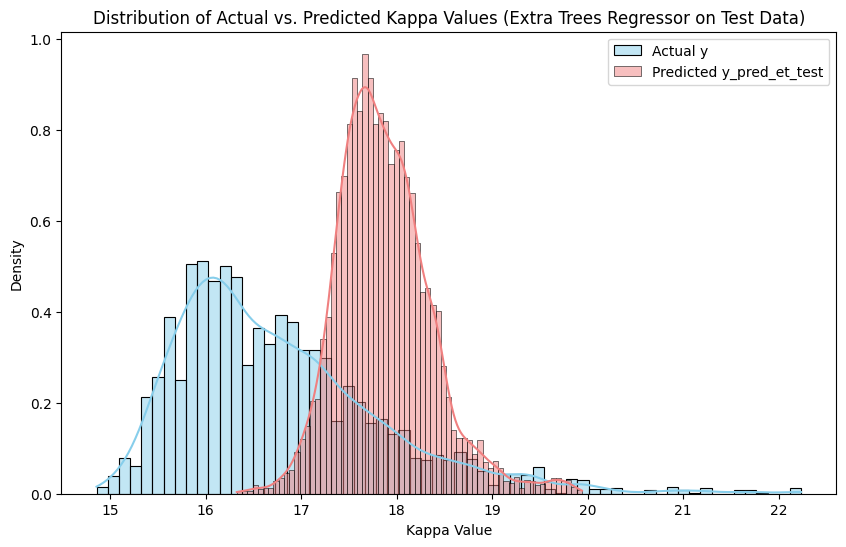

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='skyblue', label='Actual y', stat='density', common_norm=False)
sns.histplot(y_pred_et_test, kde=True, color='lightcoral', label='Predicted y_pred_et_test', stat='density', common_norm=False)
plt.title('Distribution of Actual vs. Predicted Kappa Values (Extra Trees Regressor on Test Data)')
plt.xlabel('Kappa Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Control white liquor flow

target kappa - 18 - 26



In [ ]:
df_adj = df_test.copy()
df_adj['Predicted kappa'] = y_pred_et_test

In [ ]:
def WL_adjust(pred, current):
  if pred > 26 :
    return current * 1.1  # increase flow
  elif pred < 18:
    return current * 0.9          # decrease flow
  else:
    return current


In [ ]:
df_adj['Suggested feed WL'] = df_adj.apply(
    lambda row: WL_adjust(row['Predicted kappa'], row['Feed WL Charge % shifted']), axis=1
)

In [ ]:
df_adj[['Predicted kappa', 'Feed WL Charge % shifted', 'Suggested feed WL']].head()

,Predicted kappa,Feed WL Charge % shifted,Suggested feed WL
120046,17.449719,16.780201,15.102181
120047,17.483690,16.760170,15.084153
120048,17.568744,16.766420,15.089778
120049,17.534129,16.779528,15.101575
120050,17.445694,16.776491,15.098842


In [ ]:
df_adj['Feed WL Charge % shifted'] - df_adj['Suggested feed WL']

,0
120046,1.678020
120047,1.676017
120048,1.676642
120049,1.677953
120050,1.677649
...,...
130856,1.450135
130857,1.452470
130858,1.449458
130859,1.449540


In [ ]:
df_adj[['Blow Line Kappa sensor','Predicted kappa', 'Feed WL Charge % shifted', 'Adjusted feed WL']].describe()

,Blow Line Kappa sensor,Predicted kappa,Feed WL Charge % shifted,Adjusted feed WL
count,10815.000000,10815.000000,1.081500e+04,1.081500e+04
mean,16.781059,17.873714,5.751364e+35,5.751364e+35
std,1.094445,0.495979,6.411346e+36,6.411346e+36
min,14.859236,16.327688,1.318891e+01,1.318891e+01
25%,16.009766,17.537634,1.667705e+01,1.667705e+01
50%,16.543831,17.821554,1.692840e+01,1.692840e+01
75%,17.309834,18.148614,1.713855e+01,1.713855e+01
max,22.232632,19.939098,1.000000e+38,1.000000e+38


In [ ]:
(df_adj['Feed WL Charge % shifted'] - df_adj['Adjusted feed WL']).sum()

np.float64(0.0)